In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\VS_code\Supply Chain Optimization with Reinforcement Learning\DataCoSupplyChainDatasetRefined.csv")


<>:4: SyntaxWarning: invalid escape sequence '\V'
<>:4: SyntaxWarning: invalid escape sequence '\V'
C:\Users\tejas\AppData\Local\Temp\ipykernel_25616\1762185056.py:4: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\VS_code\Supply Chain Optimization with Reinforcement Learning\DataCoSupplyChainDatasetRefined.csv")


In [122]:
df.drop(columns=[
    "category_id", "customer_city", "customer_country", "customer_email", "customer_id",
    "customer_lname", "customer_password", "customer_state", "customer_street",
    "product_image", "customer_zipcode"
], inplace=True)


**The following section tells us which category of product is delivered late in a particular country ,the country name can be updated to check it  for various countries**           

In [123]:
unique_countries = df["order_country"].unique()
for country in unique_countries:
    print(country)

Indonesia
India
Australia
China
Japón
Corea del Sur
Singapur
Turquía
Mongolia
Estados Unidos
Nigeria
República Democrática del Congo
Senegal
Marruecos
Alemania
Francia
Países Bajos
Reino Unido
Guatemala
El Salvador
Panamá
República Dominicana
Venezuela
Colombia
Honduras
Brasil
México
Uruguay
Argentina
Cuba
Perú
Nicaragua
Ecuador
Angola
Sudán
Somalia
Costa de Marfil
Egipto
Italia
España
Suecia
Austria
Canada
Madagascar
Argelia
Liberia
Zambia
Níger
SudAfrica
Mozambique
Tanzania
Ruanda
Israel
Nueva Zelanda
Bangladés
Tailandia
Irak
Arabia Saudí
Filipinas
Kazajistán
Irán
Myanmar (Birmania)
Uzbekistán
Benín
Camerún
Kenia
Togo
Ucrania
Polonia
Portugal
Rumania
Trinidad y Tobago
Afganistán
Pakistán
Vietnam
Malasia
Finlandia
Rusia
Irlanda
Noruega
Eslovaquia
Bélgica
Bolivia
Chile
Jamaica
Yemen
Ghana
Guinea
Etiopía
Bulgaria
Kirguistán
Georgia
Nepal
Emiratos Árabes Unidos
Camboya
Uganda
Lesoto
Lituania
Suiza
Hungría
Dinamarca
Haití
Bielorrusia
Croacia
Laos
Baréin
Macedonia
República Checa
Sri Lanka

C:\Users\tejas\AppData\Local\Temp\ipykernel_25616\2233534225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data["late_delivery_risk"] = pd.to_numeric(country_data["late_delivery_risk"], errors="coerce")


<Figure size 2400x600 with 0 Axes>

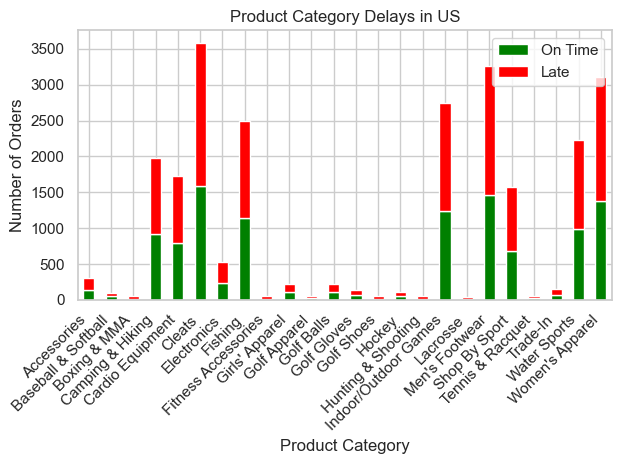

In [124]:
country_data = df[df["order_country_en"] == "USA"]
country_data["late_delivery_risk"] = pd.to_numeric(country_data["late_delivery_risk"], errors="coerce")

category_delays = country_data.groupby(["category_name", "late_delivery_risk"]).size().unstack(fill_value=0)


plt.figure(figsize=(24, 6))
category_delays.plot(kind='bar', stacked=True, color=["green", "red"])

plt.title("Product Category Delays in US")
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45, ha='right')  
plt.legend(["On Time", "Late"], loc="upper right")
plt.tight_layout()


plt.show()

**The following is a horizontal bar graph that displays how many orders are delayed per country**


In [ ]:
country_delay = df.groupby(["order_country_en"])
delayed_deliveries = country_delay["late_delivery_risk"].apply(lambda x: (x == 1).sum())
delayed_deliveries= delayed_deliveries.sort_values(ascending=True)

plt.figure(figsize=(12,45))
delayed_deliveries.plot(kind= "barh", color=["skyblue"]) 
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Delayed Deliveries per Country')
plt.yticks(rotation=45, ha='right')  
plt.show()

**What is the relationship between discount percentage and late delivery risk? To answer this question I am using a Violin Graph , if there is a difference then the thickness of the violin in the not delivered section will be thicker**

In [ ]:

df_filtered = df[['order_item_discount_rate', 'late_delivery_risk']].dropna()


plt.figure(figsize=(8, 6))
sns.violinplot(x=df_filtered["late_delivery_risk"], y=df_filtered["order_item_discount_rate"], palette="Set2")


plt.xlabel("Late Delivery Risk (0 = On Time, 1 = Late)")
plt.ylabel("Discount Percentage")
plt.title("Impact of Discount Percentage on Late Delivery Risk")


plt.show()

**Conclusion**

. Both violins have similar distributions.

. There is no strong difference in the discount percentage between late and on-time deliveries.
If discounts were causing late deliveries, we would expect higher discounts for late deliveries (shift in the right violin).

. Since both distributions are nearly identical, we can infer that discount percentage does not significantly impact delivery delays. 

**This is a box plot to answer the same question**

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df_filtered["late_delivery_risk"], y=df_filtered["order_item_discount_rate"], palette="Set2")

plt.xlabel("Late Delivery Risk (0 = On Time, 1 = Late)")
plt.ylabel("Discount Percentage")
plt.title("Box Plot of Discount Percentage vs Late Delivery Risk")

plt.show()

**What is the trend of total sales over time?	Line Chart	To see revenue growth patterns over months/years.**

In [ ]:

product_counts = df["product_name"].value_counts()


for product, count in product_counts.items():
    print(f"{product}: {count} sales")


In [ ]:
df["order_date_dateorders"] = pd.to_datetime(df["order_date_dateorders"])


product_name = "Perfect Fitness Perfect Rip Deck"
product_names = df[df["product_name"]== product_name]


product_data = (
    product_names
    .groupby(product_names["order_date_dateorders"].dt.to_period("M"))  
    .size()
    .reset_index(name="sales_count")
)


product_data["order_date_dateorders"] = product_data["order_date_dateorders"].astype(str)


plt.figure(figsize=(12, 6))
sns.lineplot(x=product_data["order_date_dateorders"], y=product_data["sales_count"], marker="o")


plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.title(f"Monthly Sales Trend of {product_name}")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**What is the correlation between order quantity and profit percentage?**
To answer this question we are using scatter plot


In [ ]:
df = df.dropna(subset=['order_item_quantity', 'order_item_profit_ratio'])
data = df[['order_item_quantity', 'order_item_profit_ratio']]
df['profit_percentage'] = (df['order_profit_per_order'] / df['order_item_product_price']) 

from scipy.stats import pearsonr
correlation_coefficient, _ = pearsonr(data['order_item_quantity'], data['order_item_profit_ratio'])
print(f"Correlation Coefficient: {correlation_coefficient}")


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.scatterplot(x='order_item_quantity', y='profit_percentage', data=df)


plt.title('Correlation Between Order Quantity and Profit Percentage')
plt.xlabel('Order Quantity')
plt.ylabel('Profit Percentage')

sns.regplot(x='order_item_quantity', y='profit_percentage', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.show()

**Is there a relation between the type of delivery and the product being delivered late?**

Count of Total Deliveries 
shipping_mode
First Class        27814
Same Day            9737
Second Class       35216
Standard Class    107752
Name: late_delivery_risk, dtype: int64
      

Count of Delayed Deliveries 
shipping_mode
First Class       26513
Same Day           4454
Second Class      26987
Standard Class    41023
Name: late_delivery_risk, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'First Class'),
  Text(1, 0, 'Same Day'),
  Text(2, 0, 'Second Class'),
  Text(3, 0, 'Standard Class')])

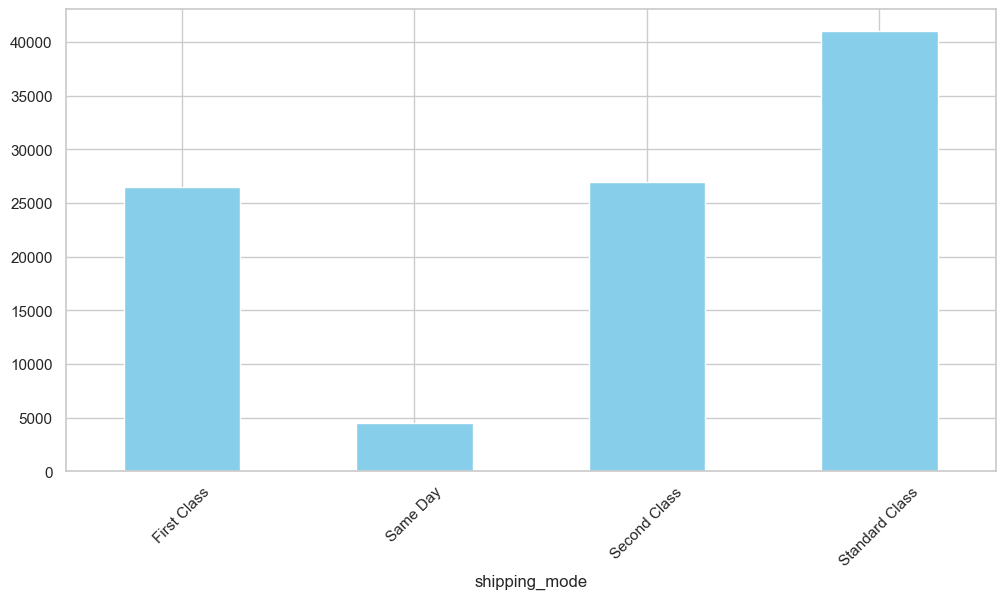

In [ ]:
delivery_standard = df.groupby(df["shipping_mode"])
delayed_deliveries_late = delivery_standard["late_delivery_risk"].apply(lambda x: (x==1).sum() )
delayed_deliveries_total = delivery_standard["late_delivery_risk"].count()

print("Count of Total Deliveries ")
print( delayed_deliveries_total)
print("      \n")
print("Count of Delayed Deliveries ")
print(delayed_deliveries_late)

plt.figure(figsize=(12, 6))
delayed_deliveries_late.plot(kind='bar', stacked=True, color=["skyblue"])
plt.xticks(rotation = 45)